In [1]:
!pip install keras_tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [2]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


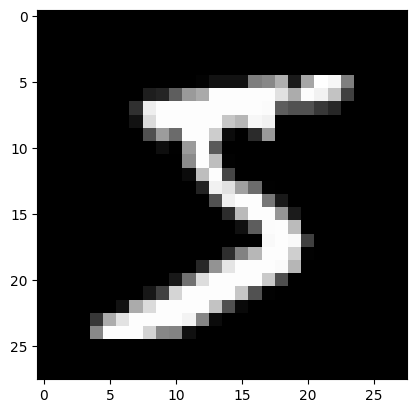

In [4]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
#grid search ro random search

def build_model(hp):
  model = keras.models.Sequential()
  model.add(Conv2D(hp.Int('Num_of_Kernel_1', min_value=10, max_value=200, step=10), (3, 3), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  if hp.Boolean('dropout'):
    model.add(Dropout(0.2))


  for i in range(hp.Int('Num_of_conv2d', 2, 5)):
     model.add(Conv2D(hp.Int('Num_of_Kernel_{i}', min_value=10, max_value=200, step=10), (3, 3), activation='relu'))

  model.add(Conv2D(64, (hp.Choice('x_kernel_size', [3, 5]), hp.Choice('y_kernel_size', [3, 5])), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer= hp.Choice('optimizer', values=['adam', 'sgd']), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
  return model

In [7]:
from keras_tuner.tuners import RandomSearch
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=3)
tuner.search(x=x_train, y=y_train, epochs=1,batch_size=64, validation_data=(x_test, y_test) )

Trial 3 Complete [00h 00m 00s]

Best val_accuracy So Far: 0.09799999743700027
Total elapsed time: 00h 00m 45s


In [8]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
Num_of_Kernel_1: 80
dropout: False
Num_of_conv2d: 3
Num_of_Kernel_{i}: 130
x_kernel_size: 3
y_kernel_size: 3
optimizer: sgd
Score: 0.09799999743700027

Trial 0 summary
Hyperparameters:
Num_of_Kernel_1: 150
dropout: True
Num_of_conv2d: 4
Num_of_Kernel_{i}: 130
x_kernel_size: 3
y_kernel_size: 5
optimizer: adam
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build

In [9]:
from keras_tuner.tuners import GridSearch
